### カリキュラム - 【AIコース】教師なし学習 クラスタリング３（階層的手法）

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

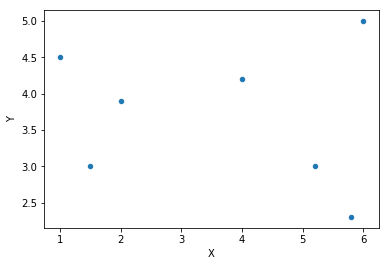

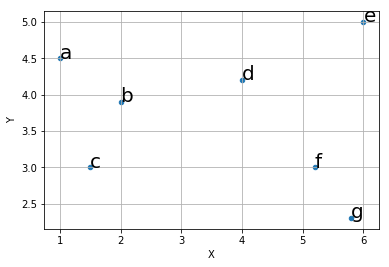

In [6]:
variables = ["X","Y"]
name = ["a","b","c","d","e","f","g"]
X = np.array(([1,4.5],[2,3.9],[1.5,3],[4,4.2],[6,5],[5.2,3],[5.8,2.3]))
df = pd.DataFrame(X, columns = variables, index = name)
fig, ax = plt.subplots()
df.plot(0,1,kind = "scatter", ax = ax)
for k, v in df.iterrows():
    ax.annotate(k,xy = (v[0],v[1]),size = 20)
plt.grid()
plt.show()

In [10]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric = "euclidean")), columns = name, index = name)
print(row_dist)

          a         b         c         d         e         f         g
a  0.000000  1.166190  1.581139  3.014963  5.024938  4.459821  5.280152
b  1.166190  0.000000  1.029563  2.022375  4.148494  3.324154  4.123106
c  1.581139  1.029563  0.000000  2.773085  4.924429  3.700000  4.356604
d  3.014963  2.022375  2.773085  0.000000  2.154066  1.697056  2.617250
e  5.024938  4.148494  4.924429  2.154066  0.000000  2.154066  2.707397
f  4.459821  3.324154  3.700000  1.697056  2.154066  0.000000  0.921954
g  5.280152  4.123106  4.356604  2.617250  2.707397  0.921954  0.000000


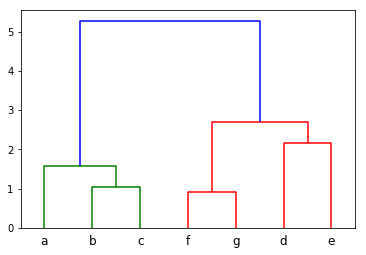

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram
row_clusters = linkage(pdist(df, metric = "euclidean"), method = "complete")
row_dender = dendrogram(row_clusters, labels = name)
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering
complete = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "complete")
y_complete = complete.fit_predict(X)
print("Cluster labels: " + str(name))

Cluster labels: ['a', 'b', 'c', 'd', 'e', 'f', 'g']


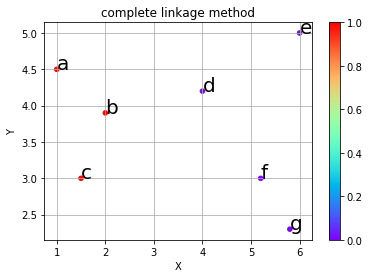

In [17]:
fig, ax = plt.subplots()
plt.title("complete linkage method")
df.plot(0,1,kind = "scatter", ax = ax, c = y_complete, cmap = plt.cm.rainbow)
for k, v in df.iterrows():
    ax.annotate(k, xy = (v[0], v[1]), size =  20)
plt.grid()
plt.show()